<a href="https://colab.research.google.com/github/Tienspkt/AI_20146196_Le-Minh-Tien/blob/main/10_fashion_mnist(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<function matplotlib.pyplot.show(close=None, block=None)>

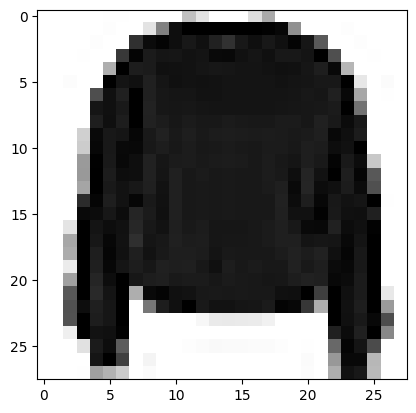

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt      
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
hinh = x_train[7]
plt.imshow(hinh  , cmap=plt.cm.binary)                               
plt.show

In [ ]:
 # deeplearning:CNN
 #sử dụng ANN HỌC TRÊN từng pixel học được ảnh 1 kênh màu còn 3 kênh màu độ chính xác thấp
      #CNN: học trích cuất ra đặc tính nó là gì và độ chính xác nó rất cao 
      # nó có thể làm mạng GANG bắt chước vẽ tranh
      #CNN: chủ yếu focus vào vấn để ảnh âm thanh
#CNN: sử dụng phép toán tích chập của ma trận
# sử dụng bộ lọc 3*3 để tách biên
# tích chập nhân 2 thành phần trên dưới với nhau và cộng nó lại
# thêm bộ đệm(padding) có giá trị xung quanh bằng 0
#sủ dụng phương pháp Pooling lấy giá trị max và giá trị trung bình( 2 hàng 2 cột tạo thành 1 giá trị )# vì trích xuất đặt tính nên ta sử dụng max pooling
#sau khi trích xuất đặt tính xong đưa qua bộ ANN
# tích chập => pooling => ANN nhận diện
#tính chất convolution: chích xuất đặc tính sau đó => ANN (để phân loại) 
# độ chính xác cao vì thế yêu cầu phải đủ dữ liệu


<function matplotlib.pyplot.show(close=None, block=None)>

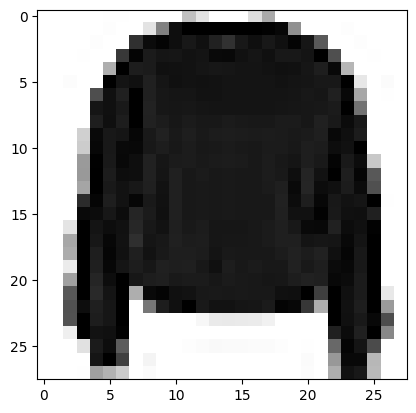

In [10]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt      
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
hinh = x_train[7]
plt.imshow(hinh  , cmap=plt.cm.binary)                               
plt.show

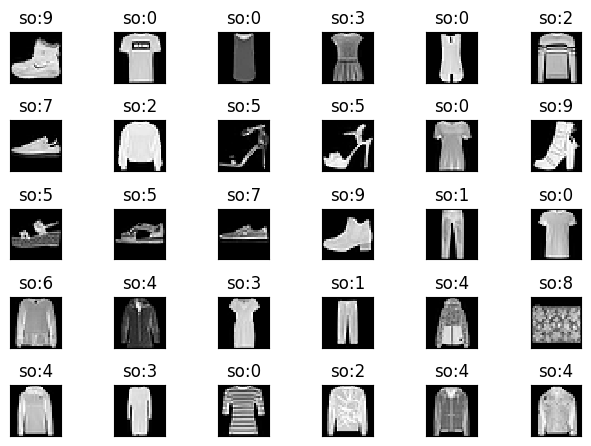

In [11]:
for i in range(30):  # 30 hình ảnh
  plt.subplot(5,6,i+1) # 6 cột , 5 hàng
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray', interpolation='none')
  plt.title('so:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [12]:
x_train = x_train.reshape((60000,28,28,1)) # đầu tiên là t reset 600000 tấm ảnh và chuyển từ ảnh 2D thành ảnh 1D
x_train = x_train.astype('float32')/255        #chuyển qua mã array chuyển sang số thực           28*28 chuyển thành 1 kênh màu
x_test = x_test.reshape((10000,28,28,1))    # lệnh định dạng
x_test = x_test.astype('float32')/255


In [13]:
from keras.utils import to_categorical # chuyển qua one host encording mã hóa 1 số về số 1 dùng để chuyển cho output
y_train = to_categorical(y_train)  
y_test= to_categorical(y_test)

In [14]:
#tạo mô hình CNN sủ dụng tuần tự
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization         #dense :full conected ANN
from keras.layers import LeakyReLU
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(28,28,1),padding = 'same'))                                                          #32 lần tích chập đầu tiên
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(128,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10,activation = 'softmax'))
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                 

In [15]:
from keras import models

train = model.fit(x_train,y_train, epochs=20, batch_size=64,verbose=1)  # lưu dữ liệu vào biến train
test_loss,test_acc = model.evaluate(x_test,y_test)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)

Epoch 1/20
938/938 [==============================] - 123s 129ms/step - loss: 0.4273 - accuracy: 0.8453
Epoch 2/20
938/938 [==============================] - 120s 128ms/step - loss: 0.2700 - accuracy: 0.9002
Epoch 3/20
938/938 [==============================] - 125s 133ms/step - loss: 0.2235 - accuracy: 0.9184
Epoch 4/20
938/938 [==============================] - 119s 127ms/step - loss: 0.1942 - accuracy: 0.9283
Epoch 5/20
938/938 [==============================] - 122s 130ms/step - loss: 0.1706 - accuracy: 0.9368
Epoch 6/20
938/938 [==============================] - 119s 127ms/step - loss: 0.1484 - accuracy: 0.9444
Epoch 7/20
938/938 [==============================] - 119s 127ms/step - loss: 0.1256 - accuracy: 0.9527
Epoch 8/20
938/938 [==============================] - 123s 132ms/step - loss: 0.1067 - accuracy: 0.9598
Epoch 9/20
938/938 [==============================] - 119s 127ms/step - loss: 0.0918 - accuracy: 0.9654
Epoch 10/20
938/938 [==============================] - 119s 127m

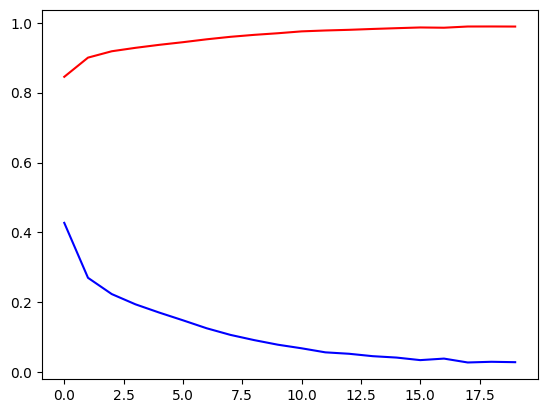

In [16]:
accuracy = train.history['accuracy']
loss = train.history['loss']                                                           # VẼ ĐỒ THỊ SỬ MẤT MÁT VÀ ĐỘ HỌC TẬP CHÍNH XÁC CỦA BÀI KIỂM TRA
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label = 'Training accuracy')
plt.plot(epochs,loss,'b',label = 'Training loss')
plt.show()